In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_excel('data_to_train.xlsx')

# Подготовка данных
X = df.drop(columns=['Вспышка Да/Нет Эталон', 'Год вспышки',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9935212180110139


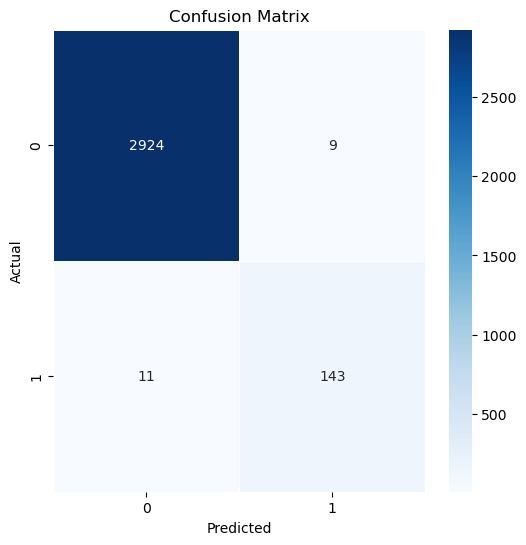

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
feature_importance[0:20]

array([0.00254015, 0.00213266, 0.00057348, 0.00017362, 0.01915289,
       0.00964571, 0.00283178, 0.00693788, 0.00183698, 0.00539272,
       0.00195628, 0.        , 0.        , 0.        , 0.00752737,
       0.00160388, 0.00515318, 0.00673841, 0.0025156 , 0.00714682])

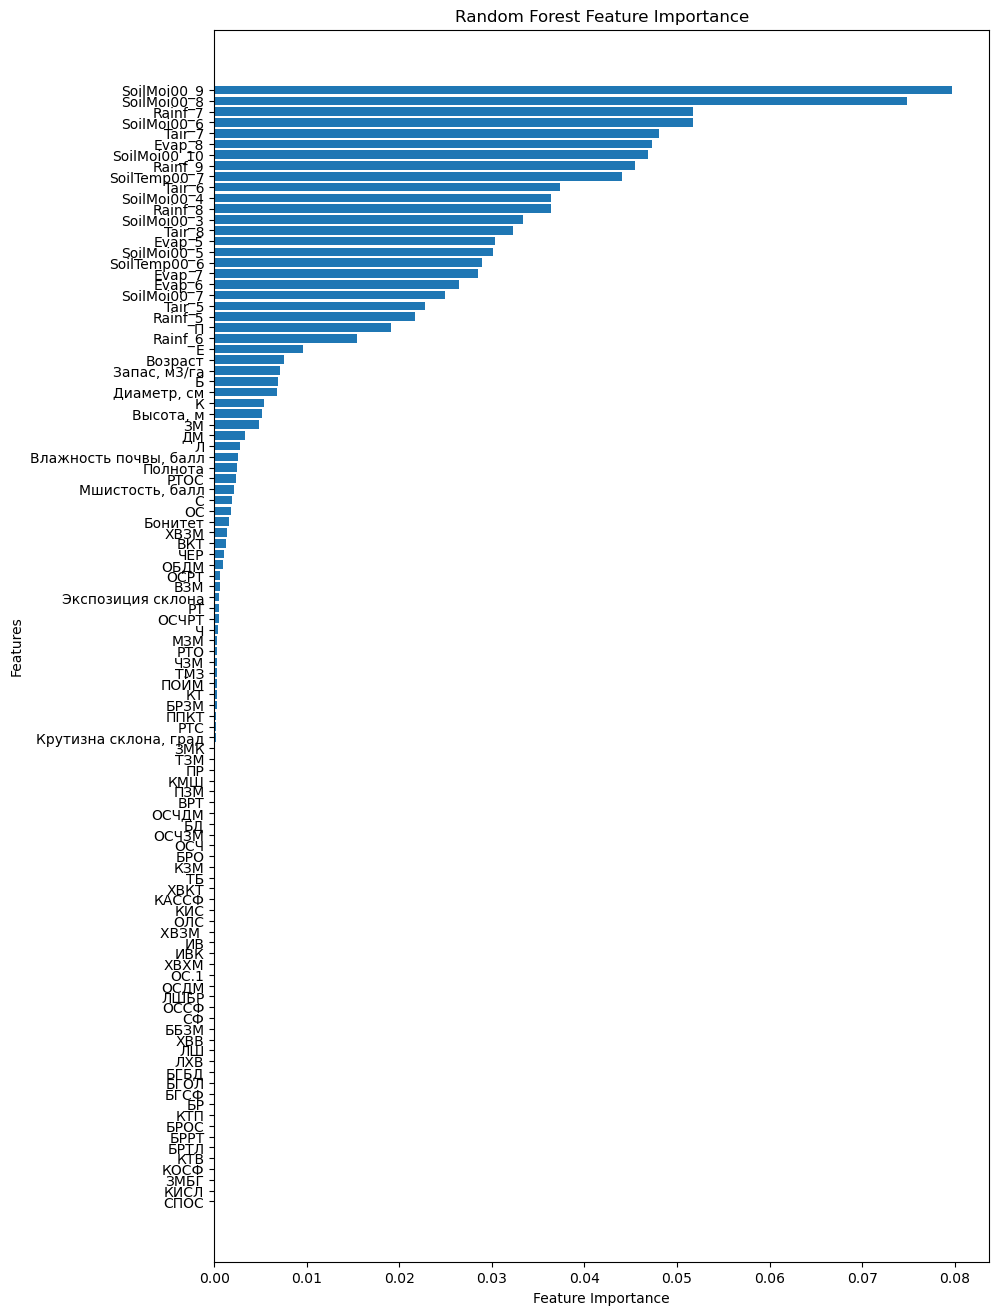

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Получение важности признаков из обученной модели случайного леса
feature_importance = clf.feature_importances_

# Получение названий признаков
feature_names = X.columns

# Сортировка индексов важности признаков
sorted_indices = np.argsort(feature_importance)

# Создание горизонтальной столбчатой диаграммы
plt.figure(figsize=(10, 16))
plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()


In [28]:
feature_names

Index(['Влажность почвы, балл', 'Мшистость, балл', 'Экспозиция склона',
       'Крутизна склона, град', 'П', 'Е', 'Л', 'Б', 'ОС', 'К',
       ...
       'Rainf_8', 'Rainf_9', 'SoilMoi00_3', 'SoilMoi00_4', 'SoilMoi00_5',
       'SoilMoi00_6', 'SoilMoi00_7', 'SoilMoi00_8', 'SoilMoi00_9',
       'SoilMoi00_10'],
      dtype='object', length=104)

In [43]:
labels_2 = ['Aspen', 'Spruce', 'Mossiness', 'Forb-sedge', 'Fullness', 
          'Soil Moisture', 'Larch', 'Long-hauled', 'Green mossy', 'Height', 'Cedar', 
          'Diameter', 'Birch', 'Volume', 'Age', 'Pine', 'Rainfall in June', 
          'Pine', 'Rainfall in May', 'Air Temperature in May']

In [44]:
labels_1 = [
    'Soil Moisture for July',
    'Evaporation for June',
    'Evaporation for July',
    'Soil Temperature for June',
    'Soil Moisture for May',
    'Evaporation for May',
    'Temperature for August',
    'Soil Moisture for March',
    'Rainfall for August',
    'Soil Moisture for April',
    'Temperature for June',
    'Soil Temperature for July',
    'Rainfall for September',
    'Soil Moisture for October',
    'Evaporation for August',
    'Temperature for July',
    'Soil Moisture for June',
    'Rainfall for July',
    'Soil Moisture for August',
    'Soil Moisture for September'
]


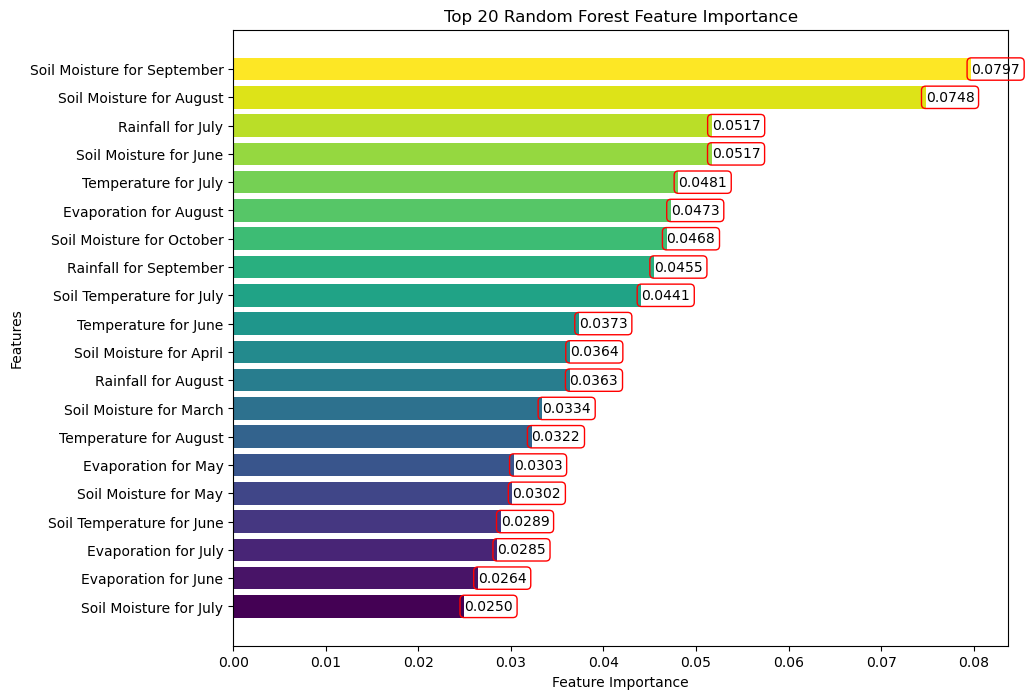

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Получение важности признаков из обученной модели случайного леса
feature_importance = clf.feature_importances_

# Получение названий признаков
feature_names = X.columns

# Сортировка индексов важности признаков
sorted_indices = np.argsort(feature_importance)

# Отображение только топ 20 наиболее важных признаков
top_indices = sorted_indices[-20:]

# Создание градиентной цветовой карты
colors = plt.cm.viridis(np.linspace(0, 1, len(top_indices)))

# Создание горизонтальной столбчатой диаграммы с градиентной окраской
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(top_indices)), feature_importance[top_indices], color=colors)

# Добавление значений на каждый столбец с рамкой красного цвета
for bar, value in zip(bars, feature_importance[top_indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.4f}', va='center',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='none'))

plt.yticks(range(len(top_indices)), labels_1)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 20 Random Forest Feature Importance')
plt.savefig('top20.pdf', bbox_inches='tight')
plt.show()


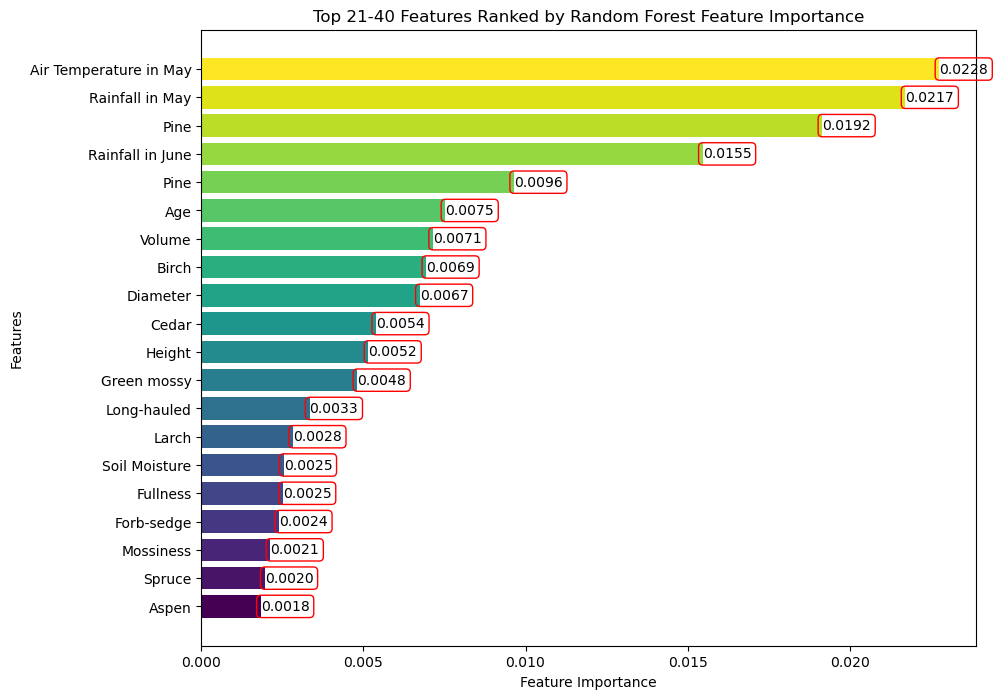

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Получение важности признаков из обученной модели случайного леса
feature_importance = clf.feature_importances_

# Получение названий признаков
feature_names = X.columns

# Сортировка индексов важности признаков
sorted_indices = np.argsort(feature_importance)

# Отображение только топ 20 наиболее важных признаков
top_indices = sorted_indices[-40:-20]

# Создание градиентной цветовой карты
colors = plt.cm.viridis(np.linspace(0, 1, len(top_indices)))

# Создание горизонтальной столбчатой диаграммы с градиентной окраской
plt.figure(figsize=(10, 8))
bars = plt.barh(range(len(top_indices)), feature_importance[top_indices], color=colors)

# Добавление значений на каждый столбец с рамкой красного цвета
for bar, value in zip(bars, feature_importance[top_indices]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.4f}', va='center',
             bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='none'))

plt.yticks(range(len(top_indices)), labels_2)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 21-40 Features Ranked by Random Forest Feature Importance')
plt.savefig('top20-40.pdf', bbox_inches='tight')
plt.show()

## Data Full

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_excel('data.xlsx')

In [17]:
df

,№,Вспышка Да/Нет Эталон,номер лесничества,Лесничество,Участковое лесничество,Год вспышки,№ Квартала,№ Выдела,"Площадь, га",Экспозиция склона,...,SoilMoi00_10cm_tavg_9_сентябрь.5,SoilMoi00_10cm_tavg_10_октябрь.5,SoilMoi00_10cm_tavg_3_март.6,SoilMoi00_10cm_tavg_4_апрель.6,SoilMoi00_10cm_tavg_5_май.6,SoilMoi00_10cm_tavg_6_июнь.6,SoilMoi00_10cm_tavg_7_июль.6,SoilMoi00_10cm_tavg_8_август.6,SoilMoi00_10cm_tavg_9_сентябрь.6,SoilMoi00_10cm_tavg_10_октябрь.6
0,1,1,2,Ирбейское,Кунгусское,2018,95,47,40,0,...,0.273635,0.280066,0.278365,0.258497,0.352304,0.298301,0.331149,0.342245,0.358699,0.361945
1,2,1,2,Ирбейское,Кунгусское,2018,108,17,54,0,...,0.279087,0.283251,0.294551,0.272649,0.352908,0.311941,0.336067,0.347789,0.362090,0.374579
2,3,1,2,Ирбейское,Кунгусское,2018,116,32,29,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
3,4,1,2,Ирбейское,Кунгусское,2018,116,37,20,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
4,5,1,2,Ирбейское,Кунгусское,2018,116,41,67,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15429,15519,0,4,Чунское,Чуноярское,1996,250,15,35,0,...,0.299628,0.273510,0.450825,0.314985,0.334075,0.259968,0.226527,0.286201,0.309178,0.283095
15430,15520,0,4,Чунское,Чуноярское,1996,250,16,61,0,...,0.299628,0.273510,0.450825,0.314985,0.334075,0.259968,0.226527,0.286201,0.309178,0.283095
15431,15521,0,4,Чунское,Чуноярское,1996,250,17,99,6,...,0.299628,0.273510,0.450825,0.314985,0.334075,0.259968,0.226527,0.286201,0.309178,0.283095
15432,15522,0,4,Чунское,Чуноярское,1996,250,18,54,0,...,0.299628,0.273510,0.450825,0.314985,0.334075,0.259968,0.226527,0.286201,0.309178,0.283095


In [22]:
# Список столбцов для удаления
columns_to_drop = ['номер лесничества', 'Лесничество', 'Участковое лесничество', 'Состав', 
                   #'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   #'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град',
                   'Год вспышки', '№ Квартала', '№ Выдела'] 
                   #'Состав', 'Влажность почвы']

# Удаление столбцов из DataFrame
#df = df.drop(columns=columns_to_drop)

# Подготовка данных
X = df.drop(columns=['Вспышка Да/Нет Эталон', 'Тип леса', 'Влажность почвы',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9935212180110139


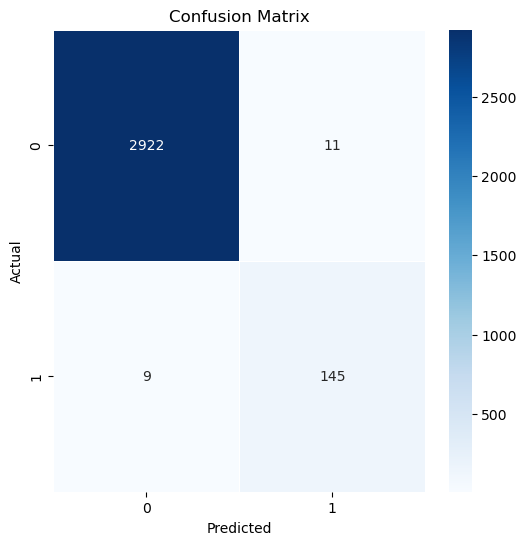

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [29]:
df_5000 = df.loc[0:5000]

In [31]:
df_5000 

,№,Вспышка Да/Нет Эталон,номер лесничества,Лесничество,Участковое лесничество,Год вспышки,№ Квартала,№ Выдела,"Площадь, га",Экспозиция склона,...,SoilMoi00_10cm_tavg_9_сентябрь.5,SoilMoi00_10cm_tavg_10_октябрь.5,SoilMoi00_10cm_tavg_3_март.6,SoilMoi00_10cm_tavg_4_апрель.6,SoilMoi00_10cm_tavg_5_май.6,SoilMoi00_10cm_tavg_6_июнь.6,SoilMoi00_10cm_tavg_7_июль.6,SoilMoi00_10cm_tavg_8_август.6,SoilMoi00_10cm_tavg_9_сентябрь.6,SoilMoi00_10cm_tavg_10_октябрь.6
0,1,1,2,Ирбейское,Кунгусское,2018,95,47,40,0,...,0.273635,0.280066,0.278365,0.258497,0.352304,0.298301,0.331149,0.342245,0.358699,0.361945
1,2,1,2,Ирбейское,Кунгусское,2018,108,17,54,0,...,0.279087,0.283251,0.294551,0.272649,0.352908,0.311941,0.336067,0.347789,0.362090,0.374579
2,3,1,2,Ирбейское,Кунгусское,2018,116,32,29,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
3,4,1,2,Ирбейское,Кунгусское,2018,116,37,20,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
4,5,1,2,Ирбейское,Кунгусское,2018,116,41,67,0,...,0.277319,0.281846,0.279065,0.259408,0.352673,0.303167,0.333260,0.344107,0.359918,0.365405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,5042,0,1,Енисейское,Енисейское,2016,812,5,14,0,...,0.375360,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
4997,5043,0,1,Енисейское,Енисейское,2016,812,6,11,0,...,0.375360,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
4998,5044,0,1,Енисейское,Енисейское,2016,812,7,26,0,...,0.375360,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
4999,5045,0,1,Енисейское,Енисейское,2016,812,8,16,0,...,0.375360,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182


In [34]:
# Список столбцов для удаления
columns_to_drop = ['номер лесничества', 'Лесничество', 'Участковое лесничество', 'Состав', 
                   #'П', 'Е', 'Л', 'Б', 'ОС', 'К', 'С',	'ИВ',	'ИВК',	'ОЛС',
                   #'Влажность почвы, балл', 'Мшистость, балл', 
                   #'Возраст', 'Бонитет', 'Высота, м', 'Диаметр, см', 'Полнота', 'Запас, м3/га',
                   #'Площадь, га', 'Экспозиция склона', 'Крутизна склона, град',
                   'Год вспышки', '№ Квартала', '№ Выдела'] 
                   #'Состав', 'Влажность почвы']

# Удаление столбцов из DataFrame
df_5000 = df_5000.drop(columns=columns_to_drop)

# Подготовка данных
X = df_5000.drop(columns=['Вспышка Да/Нет Эталон', 'Тип леса', 'Влажность почвы',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df_5000['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.983016983016983


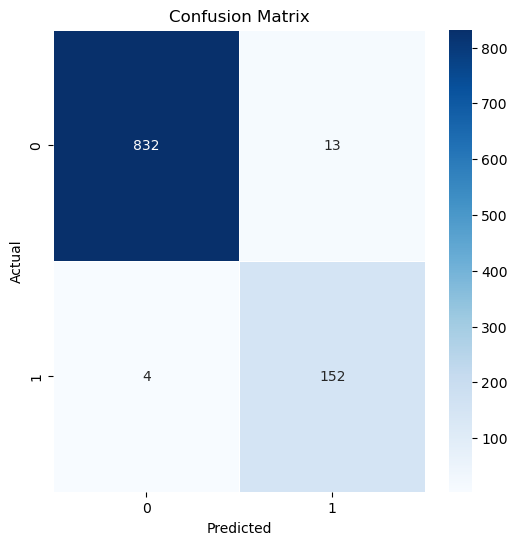

In [43]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
df_rest = df.loc[5000:6000]

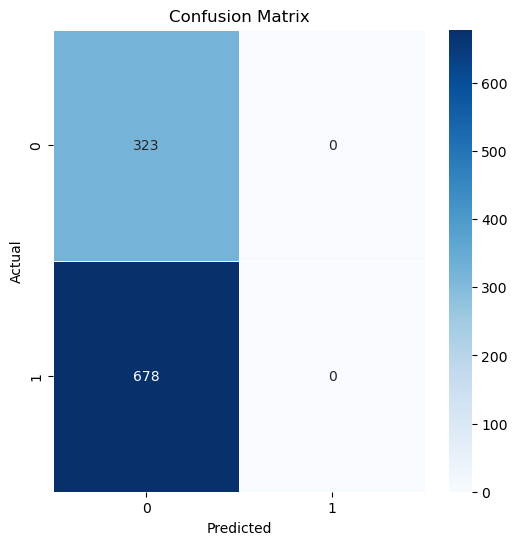

In [45]:
# Удаление столбцов из DataFrame
#df_rest = df_rest.drop(columns=columns_to_drop)

X_rest = df_rest.drop(columns=['Вспышка Да/Нет Эталон', 'Тип леса', 'Влажность почвы',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y_rest = df_rest['Вспышка Да/Нет Эталон']

# Делаем предсказания на тестовых данных
y_pred_rest = clf.predict(X_rest)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_pred_rest, y_rest)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
X_rest

,№,"Площадь, га",Экспозиция склона,"Крутизна склона, град",П,Е,Л,Б,ОС,К,...,SoilMoi00_10cm_tavg_9_сентябрь.5,SoilMoi00_10cm_tavg_10_октябрь.5,SoilMoi00_10cm_tavg_3_март.6,SoilMoi00_10cm_tavg_4_апрель.6,SoilMoi00_10cm_tavg_5_май.6,SoilMoi00_10cm_tavg_6_июнь.6,SoilMoi00_10cm_tavg_7_июль.6,SoilMoi00_10cm_tavg_8_август.6,SoilMoi00_10cm_tavg_9_сентябрь.6,SoilMoi00_10cm_tavg_10_октябрь.6
5000,5046,9,0,0,0,0,0,10,0,0,...,0.37536,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
5001,5047,7,0,0,0,1,0,5,0,4,...,0.37536,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
5002,5048,90,0,0,0,0,0,10,0,0,...,0.37536,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
5003,5049,18,0,0,1,1,0,8,0,0,...,0.37536,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
5004,5050,50,0,0,0,2,0,4,0,4,...,0.37536,0.373095,0.389789,0.453912,0.345522,0.361782,0.356504,0.364097,0.385193,0.378182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5996,6046,12,0,0,0,0,0,0,0,0,...,0.36738,0.383072,0.408181,0.460086,0.369865,0.362736,0.366920,0.373202,0.393481,0.383840
5997,6047,35,0,0,0,0,0,5,2,0,...,0.36738,0.383072,0.408181,0.460086,0.369865,0.362736,0.366920,0.373202,0.393481,0.383840
5998,6048,9,0,0,0,0,0,0,0,0,...,0.36738,0.383072,0.408181,0.460086,0.369865,0.362736,0.366920,0.373202,0.393481,0.383840
5999,6049,48,0,0,0,0,0,0,0,0,...,0.36738,0.383072,0.408181,0.460086,0.369865,0.362736,0.366920,0.373202,0.393481,0.383840


## С типом леса

In [24]:
# Применяем OHE к столбцу "Тип леса" и сохраняем результат в новый DataFrame
df_tipohe = pd.get_dummies(df['Тип леса'])

In [25]:
df = pd.concat([df, df_tipohe], axis=1)

# Подготовка данных
X = df.drop(columns=['Вспышка Да/Нет Эталон', 'Тип леса', 'Влажность почвы',
                          'Число гусениц сибирского шелкопряда на 1 дерево, шт.',	'% объедания кроны'])
y = df['Вспышка Да/Нет Эталон']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Задаем параметры модели
best_n_estimators = 56
best_max_depth = 72

# Создаем модель случайного леса с заданными параметрами
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)

# Обучаем модель на обучающих данных
clf.fit(X_train, y_train)

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Оцениваем качество модели
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9931972789115646


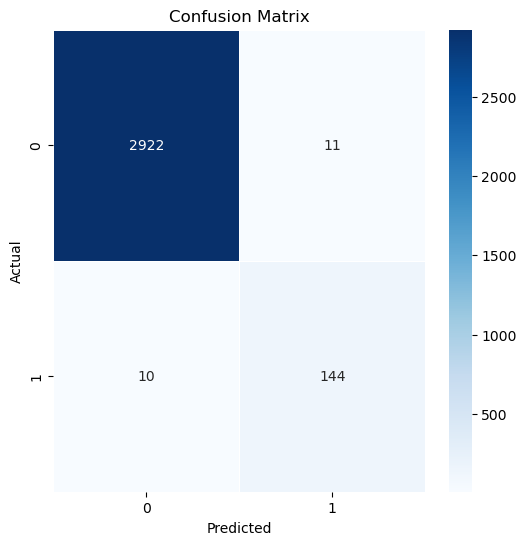

In [26]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Делаем предсказания на тестовых данных
y_pred = clf.predict(X_test)

# Вычисляем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализируем матрицу ошибок с помощью тепловой карты
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
import pandas as pd
data = pd.read_excel('populations_results.xlsx')

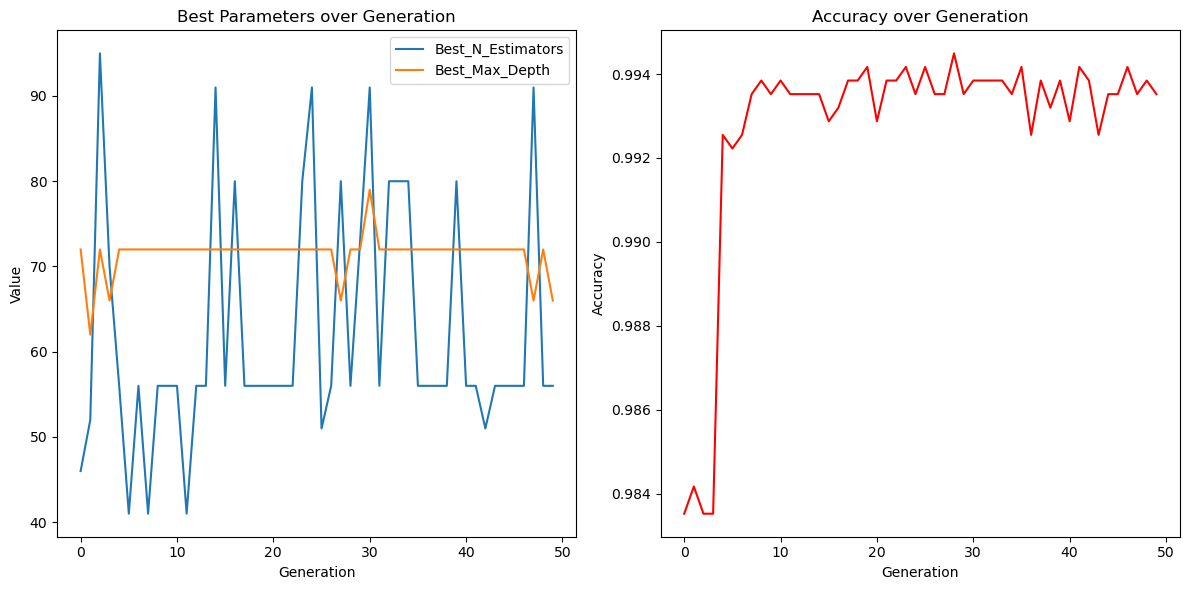

In [15]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
generation = data['Generation']
best_n_estimators = data['Best_N_Estimators']
best_max_depth = data['Best_Max_Depth']
accuracy = data['Accuracy']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Best_N_Estimators and Best_Max_Depth over generation
axs[0].plot(generation, best_n_estimators, label='Best_N_Estimators')
axs[0].plot(generation, best_max_depth, label='Best_Max_Depth')
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Value')
axs[0].set_title('Best Parameters over Generation')
axs[0].legend()

# Plot accuracy over generation
axs[1].plot(generation, accuracy, color='red')
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy over Generation')

# Show plot
plt.tight_layout()
plt.savefig('gen.pdf')
plt.show()
